# Nuages de mots

## Imports et stopwords

In [2]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/boy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "dés", "bruxelles"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [61]:
# Choisir une année
year = 1914

In [62]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [63]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [64]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [65]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"\\h' •• w OBJ. ’ERDÜS C ent francs da réeomp. & aol rapportera un petit griffon perdu. 16. rue de la. Buanderie, 26. 1661 [père d’on solda* de la if--tarais. de Liège a per- «a Jeudi mat. lettre de ton"

In [66]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [67]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"\\h' •• w OBJ. ’ERDÜS C ent francs da réeomp. & aol rapportera un petit griffon perdu. 16. rue de la. Buanderie, 26. 1661 [père d’on solda* de la if--tarais. de Liège a per- «a Jeudi mat. lettre de ton fila. Bapport. eoat. b. réo. 27. rue da Cornet. *L 1631 La Tuberculose (PHTISIE) peut être guérie ENSEIGNER!. Tiutltut St-Jasque* plaoe J. St-Jaoquea 16, Liège, • Int. et ut o. jeunes flllesi prépar, A l'UnlversItéi ré* pit. p. Jaunes filles fréq. Université, Les 7 élèV. de rinsL présent, aux diffé"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [68]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [69]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1914_clean.txt!'

In [70]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'OBJ ERDÜS ENT FRANCS RÉEOMP AOL RAPPORTERA PETIT GRIFFON PERDU RUE BUANDERIE PÈRE SOLDA TARAIS LIÈGE PER JEUDI MAT LETTRE FILA BAPPORT EOAT RÉO RUE CORNET TUBERCULOSE PHTISIE GUÉRIE ENSEIGNER TIUTLTUT JASQUE PLAOE JAOQUEA LIÈGE INT JEUNES FLLLESI PRÉPAR UNLVERSITÉI PIT JAUNES FILLES FRÉQ UNIVERSITÉ ÉLÈV RINSL PRÉSENT DIFFÉR FAOULTÉ LIÈGE SET JUIN RIMAI GRAND ÉTABL INSTR MOYENNE SEPT PROF DESSIN PROF STÉNO DACT DEAX SURVEILLANTS INTPRN ADR BOSSCL IFONSLEUR AFFECTION TUE LLLDOM GNLDE LNSTRNETION M'

## Nuage de mots

### Afficher les termes les plus fréquents


In [71]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 4103), ('PRIX', 1038), ('ANS', 998), ('MAISON', 960), ('LOUER', 932), ('BON', 865), ('FILLE', 771), ('TRÈS', 736), ('DEMANDE', 661), ('HEURES', 631)]


### Créer, stocker et afficher le nuage de mots

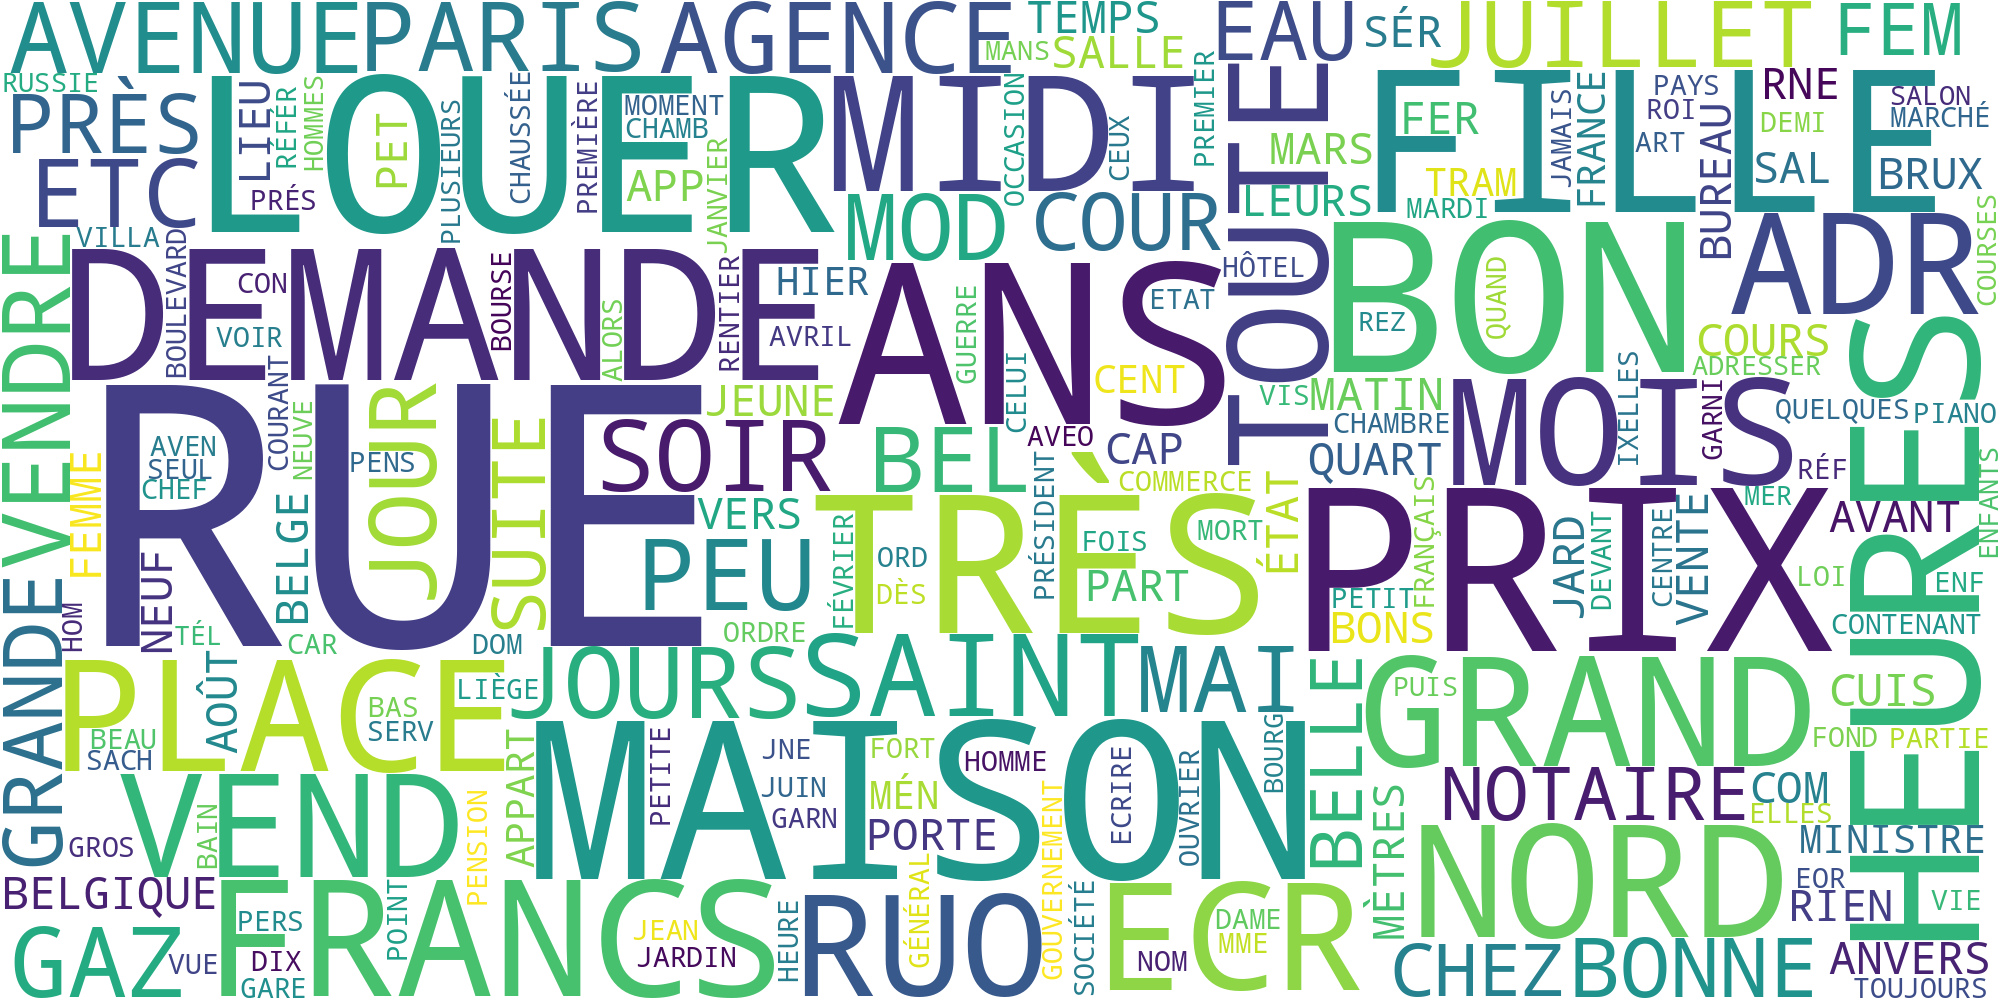

In [72]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))